In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data

--2022-06-13 16:03:48--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2022-06-13 16:03:48 (25.6 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
strings_list = list(df.columns[df.dtypes == 'object'])

In [7]:
strings_list

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for col in strings_list:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


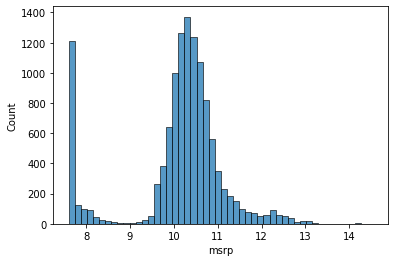

In [10]:
df['msrp'] = np.log1p(df['msrp'])
sns.histplot(df.msrp, bins=50)

In [11]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [12]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_test + n_val)
n, n_train, n_val, n_test

(11914, 7150, 2382, 2382)

In [13]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)


In [14]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [15]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,9.575747
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,9.887663
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,9.893235
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,7.601402
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,10.937757


In [16]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

y_train = df_train['msrp']
y_val = df_val['msrp']
y_test = df_test['msrp']

y_train

0        9.575747
1        9.887663
2        9.893235
3        7.601402
4       10.937757
          ...    
7145    10.913287
7146    10.282472
7147    10.453803
7148    12.622481
7149    10.540620
Name: msrp, Length: 7150, dtype: float64

In [17]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']


In [18]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

***These Features will be the training features***

In [19]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

**Here I am making a function that will prepare every x either train or valid or test**

In [20]:
def Prepare_X(df):
  df_pre = df[base]
  df_pre = df_pre.fillna(0)
  X = df_pre.values
  return X

***Now, Train our linear regression model***

In [27]:
def train_linear_regerssion_model(X, y):
  X = np.column_stack([np.ones(X.shape[0]), X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)
  return w_full[0], w_full[1:]

In [28]:
X_train = Prepare_X(df_train)
w0, w = train_linear_regerssion_model(X_train, y_train)
y_pred = w0 + X_train.dot(w)

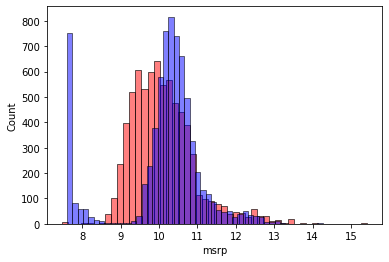

In [29]:
sns.histplot(y_pred, color= 'red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

***Now we will check the model performance usinf RMSE***

In [32]:
def RMSE(y, y_prediction):
  diff = (y_prediction - y)**2
  mean_diff = np.mean(diff)
  rmse = np.sqrt(mean_diff)
  return rmse

In [33]:
RMSE(y_train, y_pred)

0.7554192603920122

***Now we will validate our model using validation data***

In [34]:
X_val = Prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

RMSE(y_val, y_pred)

0.7616530991301557

***In the Next Steps we will using more features and using catgorical features in our training process***

In [42]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [45]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,10.739349
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,10.290483
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,10.448744


In [46]:
df['year'].max()

2017

In [51]:
Categorical_columns = ['make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

Categorical = {}

for t in Categorical_columns:
  Categorical[t] = list(df_train[t].value_counts().head().index)

Categorical

{'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'model': ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [56]:
def Prepare_X(df):
  df = df.copy()
  df['age'] = 2017 - df['year']
  features = base + ['age']

  ##Number of doors
  for c in range(2, 5):
    df['num_doors_%d' %c] = (df['number_of_doors'] == c).astype(int)
    features.append('num_doors_%d' %c)
  
  for i, k in Categorical.items():
    for value in k:
      df['%s %s' % (i, value)] = (df[i] == value).astype(int)
      features.append('%s %s' % (i, value))
  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values

  return X

In [59]:
x_train = Prepare_X(df_train)
x_val = Prepare_X(df_val)
w0, w = train_linear_regerssion_model(x_train, y_train)
y_pred = w0 + x_train.dot(w)
y_predd = w0 + x_val.dot(w)


print(RMSE(y_train, y_pred))
print(RMSE(y_val, y_predd))

228.92566713877102
82.83777025916584


***As we can see RMSE is too large so we have to make it better and to do thsi we have to use regilarization***

In [72]:
def train_linear_regerssion_model_regilrization(x, y, r = 0.0001):
  x = np.column_stack([np.ones(x.shape[0]), x])
  XTX = x.T.dot(x)
  XTX = XTX + r * np.eye(XTX.shape[0])
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(x.T).dot(y)

  return w_full[0], w_full[1:]


In [73]:
x_train = Prepare_X(df_train)
x_val = Prepare_X(df_val)

w0, w = train_linear_regerssion_model_regilrization(x_train, y_train, r = 0.01)
y_predit  = w0 + x_train.dot(w)
y_preditt = w0 + x_val.dot(w)

print(RMSE(y_train, y_predit))
print(RMSE(y_val, y_preditt))

0.4622283817462134
0.46082082863851487


***As we can see the result is different from the above one after doing regilarization, Now we will Tune our model by chooisng the best value for r that get the best results***

In [74]:
for r in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 10]:
  x_train = Prepare_X(df_train)
  x_val = Prepare_X(df_val)

  w0, w = train_linear_regerssion_model_regilrization(x_train, y_train, r = r)
  y_predit = w0 + x_val.dot(w)
  score = RMSE(y_val, y_predit)
  print(r, w0, score)

1e-06 39.76148592664236 0.46081507507377417
1e-05 8.09618142888737 0.4608153042641128
0.0001 7.1303586046951 0.46081536520245076
0.001 7.13087408161861 0.4608158584417508
0.01 7.118382072462079 0.46082082863851487
0.1 7.000232420058528 0.4608736549089933
10 4.729512585675707 0.4726098772670771


***Now after getting the best value for r we are in the final step which we will use our model on test data***

In [83]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop = True)

X_full_train = Prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regerssion_model_regilrization(X_full_train, y_full_train, r=0.0001)

x_test = Prepare_X(df_test)

y_predict = w0 + x_test.dot(w)
RMSE(y_test, y_predict)

0.4600751287056183

***Now let's test the model on a real car to get it's price***

In [90]:
test_car = df_test.iloc[40].to_dict()
df_car_test = pd.DataFrame([test_car])

X_car_test = Prepare_X(df_car_test)

y_pred = w0 + X_car_test.dot(w)

car_price = y_pred[0]

car_price

10.53842875866328

In [91]:
car_price = np.expm1(car_price)
car_price

37737.22398760559

In [93]:
real_price = np.expm1(y_test[40])
real_price

41719.999999999985